In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글처리
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

# 음수 - 표시 처리
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

In [12]:
from sklearn.datasets import load_breast_cancer, load_boston, load_iris, load_digits
from sklearn.datasets import make_blobs, make_moons

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# conda install -c anaconda py-xgboost
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree
# pip install lightgbm
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVR, SVC

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve

from sklearn.preprocessing import LabelEncoder    # 전처리에 필요한
from sklearn.preprocessing import OneHotEncoder   # 전처리에 필요한
from sklearn.preprocessing import StandardScaler   # 전처리에 필요한
from sklearn.preprocessing import MinMaxScaler   # 전처리에 필요한

from sklearn.tree import export_graphviz
import graphviz

In [3]:
import mglearn

+ 클래스 사이의 경계에 위치한 데이터 포인터를 서포트 벡터라고 한다.
+ 각 서포트벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
+ 각 서포트 벡터 사이의 마진이 가장 큰 방향으로 학습
+ 서포트 벡터까지의 거리와 서포트 벡터의 중요도를 기반으로 예측을 수행
+ 관련 클래스
    - 회귀, 분류 : SVR, SVC
    - 선형, 비선형 : LinearSVC, LinearSVR, KernelSVC, KernelSVR

# 1. 커널 기법

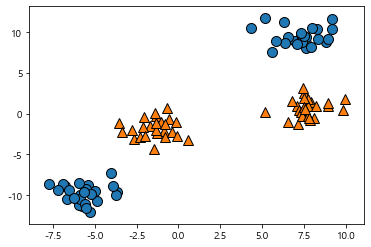

In [6]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y = y%2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

C:\Users\alcls\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


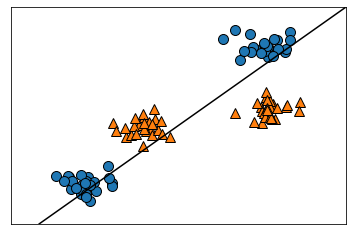

In [7]:
linear_svm = LinearSVC().fit(X, y)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(linear_svm, X)

C:\Users\alcls\AppData\Local\Temp\ipykernel_22048\4078065501.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, '특성1 ** 2')

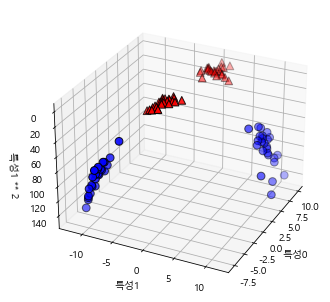

In [8]:
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")


C:\Users\alcls\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alcls\AppData\Local\Temp\ipykernel_22048\3331293808.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, '특성1 ** 2')

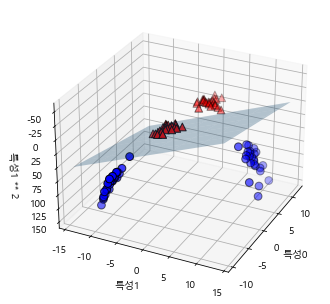

In [9]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")


Text(0, 0.5, '특성 1')

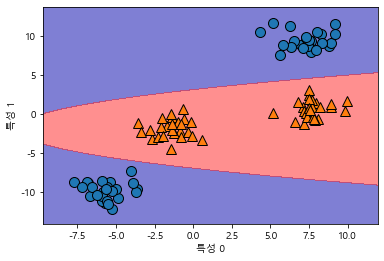

In [10]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], 
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# 2. 하이퍼 파라미터

+ cost
    - decision boundary 와 마진의 간격을 어느정도로 할지 결정
    - cost가 작으면 마진은 커진다.

+ gamma
    - 훈련 데이터 하나 당 영향을 끼치는 범위를 조절하는 변수
    - gamma가 작을 수록 영향을 끼치는 범위가 넓어진다.

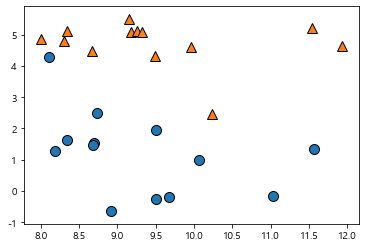

In [11]:
X, y = mglearn.tools.make_handcrafted_dataset()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

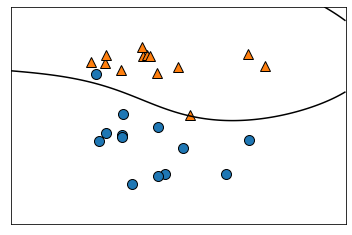

In [14]:
svm = SVC(kernel="rbf", C=10, gamma=0.1).fit(X, y)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(svm, X)

In [17]:
sv = svm.support_vectors_

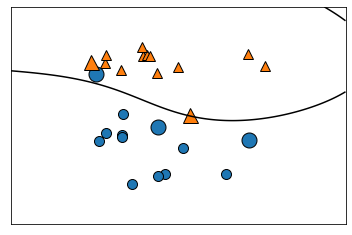

In [18]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(svm, X)

sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15)

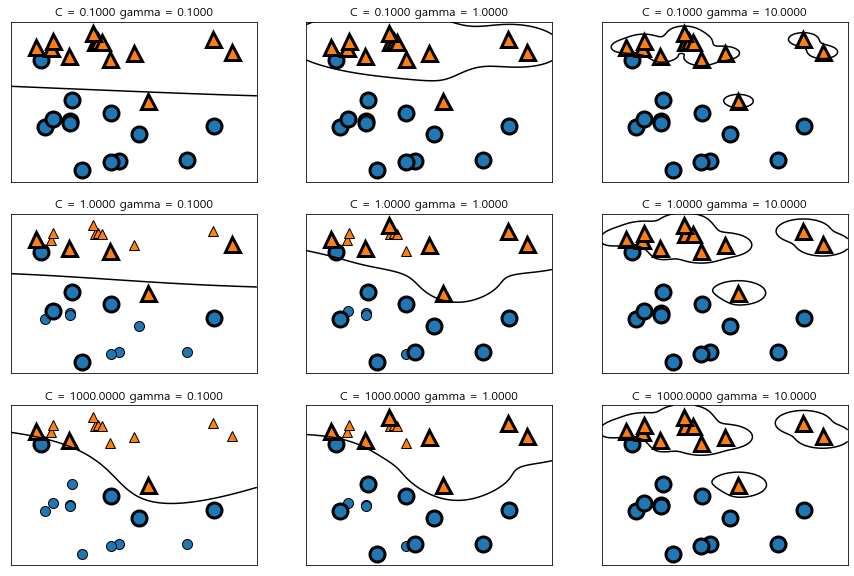

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax=a)